<a href="https://colab.research.google.com/github/Amit-Padye/ZOMATO-RESTAURANT-CLUSTERING-AND-SENTIMENT-ANALYSIS/blob/main/Amit_Padye_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
df1=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')
df2=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')

In [10]:
df1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [11]:
df1.shape

(10000, 7)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [13]:
df1.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Hunger Maggi Point,Ankita,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [14]:
df2.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [15]:
df1.shape,df2.shape

((10000, 7), (105, 6))

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [17]:
df2.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Arena Eleven,https://www.zomato.com/hyderabad/being-hungry-...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [18]:

df=df1.merge(df2, left_on='Restaurant', right_on='Name').drop('Name',axis=1)

In [19]:
df.shape

(10000, 12)

In [20]:
df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


In [21]:
df.isnull().sum()

Restaurant        0
Reviewer         38
Review           45
Rating           38
Metadata         38
Time             38
Pictures          0
Links             0
Cost              0
Collections    5000
Cuisines          0
Timings         100
dtype: int64

###Restaurant

In [22]:
df['Restaurant'].nunique()

100

**100 Restaurant information is given**

In [23]:
df['Restaurant'].value_counts()

Hunger Maggi Point                  100
Pista House                         100
Being Hungry                        100
KFC                                 100
Hyderabadi Daawat                   100
                                   ... 
Delhi-39                            100
La La Land - Bar & Kitchen          100
T Grill                             100
Feast - Sheraton Hyderabad Hotel    100
Mohammedia Shawarma                 100
Name: Restaurant, Length: 100, dtype: int64

**Each restaurant has 100 review 100*100=10000**

###Review

In [24]:
df[(df['Review'].isnull())  & df['Rating'].isnull()].shape

(38, 12)

In [25]:
df[(df['Review'].isnull())  & df['Rating'].notnull()].shape

(7, 12)

In [26]:
df[(df['Review'].isnull())  & df['Rating'].notnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0,https://www.zomato.com/hyderabad/amul-gachibowli,150,NaN,"Ice Cream, Desserts",10 AM to 5 AM
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0,https://www.zomato.com/hyderabad/being-hungry-...,450,NaN,"North Indian, Chinese","12 Noon to 3 PM, 7 PM to 11:30 PM"
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0,https://www.zomato.com/hyderabad/hyderabad-che...,600,NaN,"North Indian, Chinese",12 Noon to 10:30 PM
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0,https://www.zomato.com/hyderabad/hyderabad-che...,600,NaN,"North Indian, Chinese",12 Noon to 10:30 PM
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0,https://www.zomato.com/hyderabad/olive-garden-...,700,NaN,"North Indian, Chinese, Continental, Biryani","12 Noon to 3:30 PM, 7 PM to 11 PM"
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0,https://www.zomato.com/hyderabad/al-saba-resta...,750,NaN,"North Indian, Chinese, Seafood, Biryani, Hyder...",6 AM to 11:30 PM
8844,Domino's Pizza,Sayan Gupta,NaN,5,"2 Reviews , 2 Followers",8/9/2018 21:41,0,https://www.zomato.com/hyderabad/dominos-pizza...,400,NaN,"Fast Food, Pizza",11 AM to 11 PM


###Rating

In [27]:
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [28]:
df['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

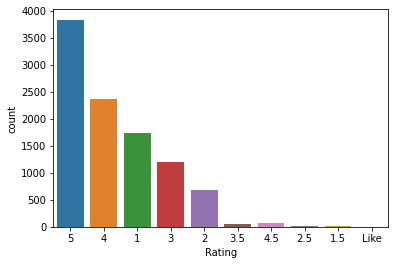

In [29]:
sns.countplot(df['Rating'])

In [30]:
df_like=df[df['Rating']=='Like']

In [31]:
df_like['Rating']='5'

In [32]:
df=df[df['Rating']!='Like']

In [33]:
df.shape

(9999, 12)

In [34]:
df = pd.concat([df, df_like])
#df.reset_index()

In [35]:
df.shape

(10000, 12)

In [36]:
#changing data type of rating
df['Rating']=df['Rating'].astype(float)

In [37]:
df[df['Rating'].isnull()].head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Links,Cost,Collections,Cuisines,Timings
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0,https://www.zomato.com/hyderabad/american-wild...,600,Food Hygiene Rated Restaurants in Hyderabad,"American, Fast Food, Salad, Burger",12 Noon to 4 AM


In [38]:
df[df['Rating'].isnull()]['Restaurant'].nunique()

2

**There are duplicate in dataet and as rating and text review is not available so we con drop this rows.** 

In [39]:
df=df.drop_duplicates(subset=df.columns, keep=False)

In [40]:
df.shape  #38 duplicates

(9962, 12)

**38 duplicates present**

###Metadata

In [41]:
df['Metadata'].nunique()

2477

In [42]:
df['Metadata'].value_counts()

1 Review                        919
1 Review , 1 Follower           750
2 Reviews , 1 Follower          337
2 Reviews                       262
1 Review , 2 Followers          227
                               ... 
2 Reviews , 332 Followers         1
67 Reviews , 225 Followers        1
51 Reviews , 99 Followers         1
25 Reviews , 1290 Followers       1
104 Reviews , 2833 Followers      1
Name: Metadata, Length: 2477, dtype: int64

In [43]:
df1[['Reviews_Given','Followers']] = df['Metadata'].str.split(',',expand=True)

In [44]:
df1.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews_Given,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,1 Review,2 Followers
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3 Reviews,2 Followers
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2 Reviews,3 Followers
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,1 Review,1 Follower
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3 Reviews,2 Followers


###Cost

In [45]:
df['Cost'] = df['Cost'].str.replace(',', '')


In [46]:
df['Cost'] = df['Cost'].astype(float)

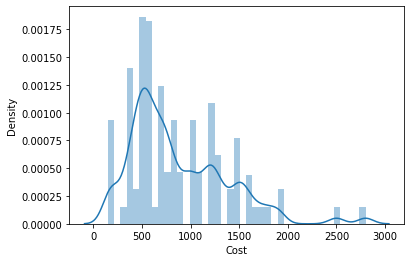

In [47]:
sns.distplot(df['Cost'])

###Collections

In [48]:
df[df['Collections'].isnull()]['Restaurant'].nunique()

50

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 7601
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Restaurant   9962 non-null   object 
 1   Reviewer     9962 non-null   object 
 2   Review       9955 non-null   object 
 3   Rating       9962 non-null   float64
 4   Metadata     9962 non-null   object 
 5   Time         9962 non-null   object 
 6   Pictures     9962 non-null   int64  
 7   Links        9962 non-null   object 
 8   Cost         9962 non-null   float64
 9   Collections  4962 non-null   object 
 10  Cuisines     9962 non-null   object 
 11  Timings      9862 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.3+ MB


###Cuisines

In [160]:
cuisines = df2['Cuisines']
cuisines = cuisines.apply(lambda x : x.lower())

In [162]:
from collections import Counter  

In [165]:
all_cuisines = ', '.join(i for i in cuisines.tolist())
print(all_cuisines)
all_cuisines = Counter(all_cuisines.split(', '))
print(all_cuisines)
all_cuisines = pd.DataFrame.from_dict(all_cuisines, orient='index', dtype='int')
all_cuisines.columns = ['No Of Restaurents']
all_cuisines.sort_values(by='No Of Restaurents', ascending=False, inplace=True)
cusines=pd.DataFrame(all_cuisines[0:10])
cusines

chinese, continental, kebab, european, south indian, north indian, biryani, north indian, chinese, asian, mediterranean, north indian, desserts, biryani, north indian, chinese, seafood, beverages, asian, continental, north indian, chinese, mediterranean, seafood, goan, north indian, continental, asian, healthy food, north indian, continental, south indian, lebanese, american, chinese, north indian, kebab, south indian, ice cream, desserts, street food, north indian, fast food, mediterranean, north indian, kebab, bbq, continental, american, chinese, north indian, italian, finger food, european, mediterranean, north indian, burger, fast food, north indian, chinese, north indian, north indian, chinese, continental, north indian, chinese, biryani, north indian, north indian, japanese, italian, salad, sushi, american, ice cream, desserts, north indian, chinese, continental, continental, mexican, italian, north indian, chinese, salad, north indian, mediterranean, european, mughlai, biryani, 

,No Of Restaurents
north indian,61
chinese,43
continental,21
biryani,16
fast food,15
asian,15
italian,14
desserts,13
south indian,9
bakery,7


In [60]:
3 in [1, 2, 3]

True

###Sentiment Analysis

In [61]:
sent_df=df.loc[:,['Review','Rating']]

In [62]:
#drop review having nan
sent_df=sent_df.dropna() 

In [63]:
sent_df.head()

,Review,Rating
0,"The ambience was good, food was quite good . h...",5.0
1,Ambience is too good for a pleasant evening. S...,5.0
2,A must try.. great food great ambience. Thnx f...,5.0
3,Soumen das and Arun was a great guy. Only beca...,5.0
4,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [64]:
sent_df.set_index("Review", inplace = True)

In [65]:
a=sent_df[sent_df['Rating']==3]

In [66]:
a.head()

,Rating
Review,
"Short review: Decent breads and starters, bad Shaam Savera, a little screwed up daal makhni (but should be a one-off case)\nBetter ambience at night... And importantly good quantity!\nI wanted to give a 2.5 but that's not an option 🙈\nExtensive...\nAmbience: It's better at night. Friends who had been here during the day didn't like it much. So if you prefer ambience, go at night!\nFood! Ordered a Hara Bhara Kebab, Shaam Savera, Daal Makhni, rotis and raita (Yes! I'm a vegetarian 🙈)\nThe good part! Quantity 😍\nI was excited to see Shaam Savera on their menu. But take it from me, you do not want to order it. It is no where close to what it should be. They messed it up real bad, especially the colors.\nThe daal makhni had big chunks of garlic cloves which spoiled it for me. It wasn't creamy too :(\nThe breads and raita were decent!\nThe Hara Bhara Kebabs were decent too, soft! They had an extra outer coating of peanuts. So if you're not a peanut fan on your kebabs, ask them to skip that step 🙈\nConclusion: It looked like they had made food in a hurry.\nWould like to give this place another try hoping that mine was one of the odd cases. If things change, you'll know!",3.0
The reason for giving only a 3 star is because of the longlong time wait for the tables. We went on Friday afternoon. We waited almost more than 30mins to get a table. We lost our patience and left for another restaurant as v didn't get a table even aftr waiting for such a long time.I think restaurant management should take this into consideration and try to decrease the waiting time of customer.,3.0
"We went for lunch buffet yesterday and took a chance after seeing some good and some average reviews in Zomato.\n\nThe spread in buffet is too less, just 3 veg and 3 non veg starters, 2 main course in veg and non veg, just one fried rice and chicken Biryani.\nDesserts are ice cream and jamun.\n\nThe taste was ok and not to expect too much. Little disappointing when starters are not hot.\n\nFish fry was decent, Schezwan chicken was ok.\nVeg spring rolls were too good.\nBig surprise for me is Onion rings as starters 🤣😂\n\nKadai ghost in main course was good but missing that masala flavour.\nChicken was ok. Biryani is average, egg fried rice was good.\n\nFor the money we pay, we expect some good food. They use much of colour in food item's.\n\nSuggestion to management is use less coating and less food colouring in starters.\n\nOverall experience is ok, but they can be much better for the amount you pay.",3.0
"We happened to go to this place on last sunday and it was mothers day and they had flat 50 on the buffet meal for the mother which i really liked..Needless to say the Ambience and music was really good .We had a reservation but had to wait fir 10 mins to get a seat..They served us mango juice as wrlcome drink which tasted really good.The buffet spread was one of a kind:\nStrters : Veg : paneer tikka, veg spring roll and veg cutlet.They were lil cold but the taste wad good\nNon veg : chicken kebab , chicken manchurian and fish .Fish was very tasty though it coupd taste better if it was hot.Chicken was fair enuf.\nSingapore Noodles,Egg salad and pasta : They were good but it was cold.\nMain course: mutton rogan josh, chicken tikka masala,palak paneer All were equally good\nBiriyani: Egg frued rice and chicken biriyani were really great.\nDesserts : moong dal halwa tasted really yumm, ice cream,gulab jamun,cut fruits,banana cake\n\nThe staff were too slow in service and the food was refilles very slow.We had to wait for quite long time to actually eat to stomach full.\n\nThey could improve the above points to stand better!\nOverall :3.2",3.0
"I have been to this place twice and had 2 different experiences.\n1st time it was with colleagues and I loved the food and ambience and service and everything except the prices as it was too costly. Their special baked biriyani is work a try, it's unique and tasty.\nBecause of the good experience I revisited thi

In [67]:
a=sent_df[sent_df['Rating']==3.5]

In [68]:
a.head(10)

,Rating
Review,
It's too crowded with delivery executives all the time.. Don't find place to sit mostly. It'd be better if they provide some way out. Preferable to online order than physical visit.,3.5
Nice pocket friendly place. Burgers and sandwiches are tasty and value for money. The have a wide variety of different pastries. The upper section is very nice to spend time chatting and munching.,3.5
"Well, all the time I have ordered here it has been Veg Corn Burger and Paneer Cheese Roll.\nThey are too sweet to be considered as fast foods.\nThe pastery I tried once was over moist. Don't know why but I guess the refrigerator wasn't working well.\n\nThe have a really good value for money. But I have seen that they don't make burgers and rolls at that time. They simply defrost the frozen food in the microwave and put in some mayo and sauce and give it.\n\nQuality: 3/5\nQuantity: 4/5\nAmbience: 3/5 Nothing extra ordinary.\nValue for money: 4.5/5",3.5
chocolate truffle is great here!\nFerrerro rocher pastry melts in your mouth like lava...\nPleasant place....sets the mood for a cake\n\n\nyummmmmyyyyyyyyyyyyyyyyyyyyyy,3.5
"KS bakers , known for its food in bakery items.\nOrdered Veg hot dogs,\nPremium butter scotch pastry,\nItalian chocolate pastry,\nVeg hot dog, stuffed with Aloo, onions , tomato slices and mayonnaise , tastes good.\nPastries are also worth a try.\n\nOverall ok.",3.5
Ordered chicken and cheese burger and egg puff from here. The burger was nice with an overload of cheese. Really liked the packaging. Egg puff was also tasty. A decent bakery with some good food and affordable prices.,3.5
"The burger was just decent but complete value for money at 75 bucks! The ""Premium"" Butterscotch pastry was a letdown though. Also ordered ""Tangdi Kabab"" and found it decent.\n\nThis place's USP is value for money. The rates are really nominal & easy on pocket.",3.5
It's a good option but the bread they use for hot dogs and burgers is something which has to be improved. Burgers buns are too thick and the patty and filling at times is way too oily. They have pretty good dining area too on the first floor. The place is neat and service is pretty fast. Being an old brand catering to twin cities this place has always been a good option to grab some quick bites and lip smacking pastries.,3.5
"Neat and clean ambiance. Small place but it's worth a visit. I took snack boxes from here for an office event. Try muffins, they were of amazing taste which was liked by almost 200people in my team.\nOn time Delivery dint happened for me which was little disappointing but rest all was perfect .",3.5


In [69]:
sent_df['Rating'].value_counts()

5.0    3827
4.0    2373
1.0    1735
3.0    1192
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
Name: Rating, dtype: int64

In [70]:
sent_df.isnull().sum()

Rating    0
dtype: int64

In [71]:
def sentiment(rating):
  if rating>=3.5:
    return 1 # positive sentiment
  else:
    return 0


In [72]:
sent_df['sentiment']=sent_df['Rating'].apply(lambda x:sentiment(x))

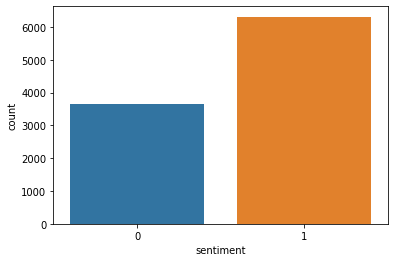

In [73]:
sns.countplot(sent_df['sentiment'])

In [74]:
sent_df.reset_index(inplace=True)

In [75]:
sent_df

,Review,Rating,sentiment
0,"The ambience was good, food was quite good . h...",5.0,1
1,Ambience is too good for a pleasant evening. S...,5.0,1
2,A must try.. great food great ambience. Thnx f...,5.0,1
3,Soumen das and Arun was a great guy. Only beca...,5.0,1
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,1
...,...,...,...
9950,This place has never disappointed us.. The foo...,4.5,1
9951,"Bad rating is mainly because of ""Chicken Bone ...",1.5,0
9952,I personally love and prefer Chinese Food. Had...,4.0,1
9953,Checked in here to try some delicious chinese ...,3.5,1


###Remove Emoji

In [76]:
#!/usr/bin/env python
import re

In [77]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)



In [78]:
sent_df['Review']=sent_df['Review'].apply(lambda x:deEmojify(x))

In [79]:
a=sent_df[sent_df['Rating']==3.5]
a.set_index("Review", inplace = True)

In [80]:
#check weather emoji removed or not
a.head(10)

,Rating,sentiment
Review,,
It's too crowded with delivery executives all the time.. Don't find place to sit mostly. It'd be better if they provide some way out. Preferable to online order than physical visit.,3.5,1
Nice pocket friendly place. Burgers and sandwiches are tasty and value for money. The have a wide variety of different pastries. The upper section is very nice to spend time chatting and munching.,3.5,1
"Well, all the time I have ordered here it has been Veg Corn Burger and Paneer Cheese Roll.\nThey are too sweet to be considered as fast foods.\nThe pastery I tried once was over moist. Don't know why but I guess the refrigerator wasn't working well.\n\nThe have a really good value for money. But I have seen that they don't make burgers and rolls at that time. They simply defrost the frozen food in the microwave and put in some mayo and sauce and give it.\n\nQuality: 3/5\nQuantity: 4/5\nAmbience: 3/5 Nothing extra ordinary.\nValue for money: 4.5/5",3.5,1
chocolate truffle is great here!\nFerrerro rocher pastry melts in your mouth like lava...\nPleasant place....sets the mood for a cake\n\n\nyummmmmyyyyyyyyyyyyyyyyyyyyyy,3.5,1
"KS bakers , known for its food in bakery items.\nOrdered Veg hot dogs,\nPremium butter scotch pastry,\nItalian chocolate pastry,\nVeg hot dog, stuffed with Aloo, onions , tomato slices and mayonnaise , tastes good.\nPastries are also worth a try.\n\nOverall ok.",3.5,1
Ordered chicken and cheese burger and egg puff from here. The burger was nice with an overload of cheese. Really liked the packaging. Egg puff was also tasty. A decent bakery with some good food and affordable prices.,3.5,1
"The burger was just decent but complete value for money at 75 bucks! The ""Premium"" Butterscotch pastry was a letdown though. Also ordered ""Tangdi Kabab"" and found it decent.\n\nThis place's USP is value for money. The rates are really nominal & easy on pocket.",3.5,1
It's a good option but the bread they use for hot dogs and burgers is something which has to be improved. Burgers buns are too thick and the patty and filling at times is way too oily. They have pretty good dining area too on the first floor. The place is neat and service is pretty fast. Being an old brand catering to twin cities this place has always been a good option to grab some quick bites and lip smacking pastries.,3.5,1
"Neat and clean ambiance. Small place but it's worth a visit. I took snack boxes from here for an office event. Try muffins, they were of amazing taste which was liked by almost 200people in my team.\nOn time Delivery dint happened for me which was little disappointing but rest all was perfect .",3.5,1


###Remove Ratings and \n from review

In [81]:
tweet="4/5\nAmbience: 3/5 Nothing extra ordinary.\nValue for money: 4.5/5"

In [82]:
tweet=re.sub(r'([0.-9.]+/+[0.-9.]+)','',tweet)

In [83]:
tweet

'\nAmbience:  Nothing extra ordinary.\nValue for money: '

In [84]:
re.sub(r'(\n+)','',tweet)

'Ambience:  Nothing extra ordinary.Value for money: '

In [85]:
def remove_rating(rating):
  rating=re.sub(r'([0.-9.]+/+[0.-9.]+)','',rating)
  rating=re.sub(r'(\n+)','',rating)
  return rating

In [86]:
sent_df['Review']=sent_df['Review'].apply(lambda x:remove_rating(x))

In [87]:
a=sent_df[sent_df['Rating']==3.5]
a.set_index("Review", inplace = True)

In [88]:
a.head(10)

,Rating,sentiment
Review,,
It's too crowded with delivery executives all the time.. Don't find place to sit mostly. It'd be better if they provide some way out. Preferable to online order than physical visit.,3.5,1
Nice pocket friendly place. Burgers and sandwiches are tasty and value for money. The have a wide variety of different pastries. The upper section is very nice to spend time chatting and munching.,3.5,1
"Well, all the time I have ordered here it has been Veg Corn Burger and Paneer Cheese Roll.They are too sweet to be considered as fast foods.The pastery I tried once was over moist. Don't know why but I guess the refrigerator wasn't working well.The have a really good value for money. But I have seen that they don't make burgers and rolls at that time. They simply defrost the frozen food in the microwave and put in some mayo and sauce and give it.Quality: Quantity: Ambience: Nothing extra ordinary.Value for money:",3.5,1
chocolate truffle is great here!Ferrerro rocher pastry melts in your mouth like lava...Pleasant place....sets the mood for a cakeyummmmmyyyyyyyyyyyyyyyyyyyyyy,3.5,1
"KS bakers , known for its food in bakery items.Ordered Veg hot dogs,Premium butter scotch pastry,Italian chocolate pastry,Veg hot dog, stuffed with Aloo, onions , tomato slices and mayonnaise , tastes good.Pastries are also worth a try.Overall ok.",3.5,1
Ordered chicken and cheese burger and egg puff from here. The burger was nice with an overload of cheese. Really liked the packaging. Egg puff was also tasty. A decent bakery with some good food and affordable prices.,3.5,1
"The burger was just decent but complete value for money at 75 bucks! The ""Premium"" Butterscotch pastry was a letdown though. Also ordered ""Tangdi Kabab"" and found it decent.This place's USP is value for money. The rates are really nominal & easy on pocket.",3.5,1
It's a good option but the bread they use for hot dogs and burgers is something which has to be improved. Burgers buns are too thick and the patty and filling at times is way too oily. They have pretty good dining area too on the first floor. The place is neat and service is pretty fast. Being an old brand catering to twin cities this place has always been a good option to grab some quick bites and lip smacking pastries.,3.5,1
"Neat and clean ambiance. Small place but it's worth a visit. I took snack boxes from here for an office event. Try muffins, they were of amazing taste which was liked by almost 200people in my team.On time Delivery dint happened for me which was little disappointing but rest all was perfect .",3.5,1



###Lower case conversion

In [89]:

sent_df['Review']=sent_df['Review'].apply(lambda x:x.lower())

In [90]:
sent_df.head()

,Review,Rating,sentiment
0,"the ambience was good, food was quite good . h...",5.0,1
1,ambience is too good for a pleasant evening. s...,5.0,1
2,a must try.. great food great ambience. thnx f...,5.0,1
3,soumen das and arun was a great guy. only beca...,5.0,1
4,food is good.we ordered kodi drumsticks and ba...,5.0,1


###convert short form

In [94]:
!pip install contractions


In [95]:
import contractions

In [96]:
sent_df['Review']=sent_df['Review'].apply(lambda x:contractions.fix(x))

In [97]:
a=sent_df[sent_df['Rating']==3.5]
a.set_index("Review", inplace = True)

In [98]:
a.head(10)

,Rating,sentiment
Review,,
it is too crowded with delivery executives all the time.. do not find place to sit mostly. it would be better if they provide some way out. preferable to online order than physical visit.,3.5,1
nice pocket friendly place. burgers and sandwiches are tasty and value for money. the have a wide variety of different pastries. the upper section is very nice to spend time chatting and munching.,3.5,1
"well, all the time i have ordered here it has been veg corn burger and paneer cheese roll.they are too sweet to be considered as fast foods.the pastery i tried once was over moist. do not know why but i guess the refrigerator was not working well.the have a really good value for money. but i have seen that they do not make burgers and rolls at that time. they simply defrost the frozen food in the microwave and put in some mayo and sauce and give it.quality: quantity: ambience: nothing extra ordinary.value for money:",3.5,1
chocolate truffle is great here!ferrerro rocher pastry melts in your mouth like lava...pleasant place....sets the mood for a cakeyummmmmyyyyyyyyyyyyyyyyyyyyyy,3.5,1
"ks bakers , known for its food in bakery items.ordered veg hot dogs,premium butter scotch pastry,italian chocolate pastry,veg hot dog, stuffed with aloo, onions , tomato slices and mayonnaise , tastes good.pastries are also worth a try.overall ok.",3.5,1
ordered chicken and cheese burger and egg puff from here. the burger was nice with an overload of cheese. really liked the packaging. egg puff was also tasty. a decent bakery with some good food and affordable prices.,3.5,1
"the burger was just decent but complete value for money at 75 bucks! the ""premium"" butterscotch pastry was a letdown though. also ordered ""tangdi kabab"" and found it decent.this place's usp is value for money. the rates are really nominal & easy on pocket.",3.5,1
it is a good option but the bread they use for hot dogs and burgers is something which has to be improved. burgers buns are too thick and the patty and filling at times is way too oily. they have pretty good dining area too on the first floor. the place is neat and service is pretty fast. being an old brand catering to twin cities this place has always been a good option to grab some quick bites and lip smacking pastries.,3.5,1
"neat and clean ambiance. small place but it is worth a visit. i took snack boxes from here for an office event. try muffins, they were of amazing taste which was liked by almost 200people in my team.on time delivery dint happened for me which was little disappointing but rest all was perfect .",3.5,1


###Remove multiple spaces

In [99]:
sent_df['Review']=sent_df['Review'].apply(lambda x: " ".join(x.split()))

In [100]:
sent_df

,Review,Rating,sentiment
0,"the ambience was good, food was quite good . h...",5.0,1
1,ambience is too good for a pleasant evening. s...,5.0,1
2,a must try.. great food great ambience. thnx f...,5.0,1
3,soumen das and arun was a great guy. only beca...,5.0,1
4,food is good.we ordered kodi drumsticks and ba...,5.0,1
...,...,...,...
9950,this place has never disappointed us.. the foo...,4.5,1
9951,"bad rating is mainly because of ""chicken bone ...",1.5,0
9952,i personally love and prefer chinese food. had...,4.0,1
9953,checked in here to try some delicious chinese ...,3.5,1


###Remove punctuations or special char

In [101]:
import string

In [102]:
def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return nopunc

In [103]:
sent_df['Review'] = sent_df['Review'].apply(text_process)

In [104]:
sent_df.head()

,Review,Rating,sentiment
0,the ambience was good food was quite good had...,5.0,1
1,ambience is too good for a pleasant evening se...,5.0,1
2,a must try great food great ambience thnx for ...,5.0,1
3,soumen das and arun was a great guy only becau...,5.0,1
4,food is goodwe ordered kodi drumsticks and bas...,5.0,1


###Remove stop words

In [105]:
import spacy

In [106]:
#loading the english language small model of spacy
en = spacy.load('en_core_web_sm')
sw_spacy = en.Defaults.stop_words
print('There are :',len(sw_spacy) ,'stop words in nltk')

There are : 326 stop words in nltk


In [107]:
list(sw_spacy)[0:10]

['anyway',
 'thereby',
 'have',
 'indeed',
 'made',
 'few',
 "n't",
 'already',
 'otherwise',
 'through']

In [108]:
sent_df['Review']=sent_df['Review'].apply(lambda x:' '.join([i for i in x.split() if i not in sw_spacy]))

In [109]:
sent_df.head()

,Review,Rating,sentiment
0,ambience good food good saturday lunch cost ef...,5.0,1
1,ambience good pleasant evening service prompt ...,5.0,1
2,try great food great ambience thnx service pra...,5.0,1
3,soumen das arun great guy behavior sincerety g...,5.0,1
4,food goodwe ordered kodi drumsticks basket mut...,5.0,1


###Converting words to root form

In [110]:
#download small spacy model
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.0 MB 7.7 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [111]:
spacy.load('en_core_web_sm')

In [112]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [113]:
def lemmatization_(sentence):
    doc = nlp(sentence)
    l=list()
    for word in doc:
        
        l.append(word.lemma_)

    return ' '.join(l)

In [114]:
sent_df['Review']=sent_df['Review'].apply(lambda x:lemmatization_(x))

In [115]:
sent_df.head()

,Review,Rating,sentiment
0,ambience good food good saturday lunch cost ef...,5.0,1
1,ambience good pleasant evening service prompt ...,5.0,1
2,try great food great ambience thnx service pra...,5.0,1
3,soumen das arun great guy behavior sincerety g...,5.0,1
4,food goodwe order kodi drumstick basket mutton...,5.0,1


In [116]:
' '.join(sent_df['Review'])

'ambience good food good saturday lunch cost effective good place sate brunch chill friend parentswaiter souman da courteous helpful ambience good pleasant evening service prompt food good good experience souman da kudos service try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta music background amazing soumen das arun great guy behavior sincerety good food course like visit place food goodwe order kodi drumstick basket mutton biryani good thank pradeep serve enjoy ambience good ambiance good service good food apradeecp subro best servicefood good papiya good hostess ur caption good 4star restaurant nice place ambience different food order tasty service gud worth visit reasonable visit place read review finally visit placeambience good come food crispy corn nice tawa fish ok basket biryani disappoint biryani ok flattering claim staff polite prompt especially pradeep suman excellent food specially like spicy food courteous staff shubro

In [117]:
words=' '.join(sent_df['Review'])
words_df=pd.Series(words)

In [118]:
word=' '.join(sent_df['Review']).split()
words_df=pd.Series(word)

In [119]:
words_df.head()

0    ambience
1        good
2        food
3        good
4    saturday
dtype: object

In [120]:
#top 5 common words
top5=words_df.value_counts()[0:10]
top5

good       7721
food       5898
place      5810
order      3455
chicken    2907
taste      2795
service    2788
try        1915
time       1864
great      1807
dtype: int64

In [121]:
# to remove most frequent words
sent_df['Review']=sent_df['Review'].apply(lambda x:" ".join([i for i in x.split() if i not in top5]))

In [122]:
sent_df.head()

,Review,Rating,sentiment
0,ambience saturday lunch cost effective sate br...,5.0,1
1,ambience pleasant evening prompt experience so...,5.0,1
2,ambience thnx pradeep subroto personal recomme...,5.0,1
3,soumen das arun guy behavior sincerety course ...,5.0,1
4,goodwe kodi drumstick basket mutton biryani th...,5.0,1


In [123]:

top5=words_df.value_counts(ascending=True)[0:10000]
sent_df['Review']=sent_df['Review'].apply(lambda x:" ".join([i for i in x.split() if i not in top5]))

In [124]:
from wordcloud import WordCloud

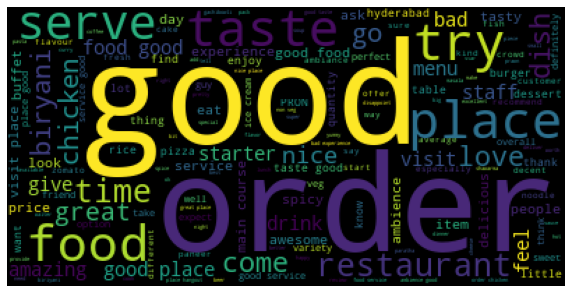

In [125]:
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(words)
plt.imshow(wc)
plt.axis('off')
plt.show()

###TfidfVectorizer

In [126]:
x = sent_df['Review']
y=sent_df['sentiment']

In [127]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(x,y,test_size=0.2,stratify=sent_df['sentiment'])

In [128]:
label_test.value_counts()

1    1263
0     728
Name: sentiment, dtype: int64

In [129]:
label_train.value_counts()

1    5053
0    2911
Name: sentiment, dtype: int64

In [130]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [131]:
tfid_vectorizer = TfidfVectorizer("english")


In [132]:
vectorizer = TfidfVectorizer("english")
x_train= vectorizer.fit_transform(msg_train)
x_test=vectorizer.transform(msg_test)


In [133]:
train_array= x_train.toarray()
test_array = x_test.toarray()

In [134]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(train_array,label_train)

In [135]:
train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

In [136]:
from sklearn.metrics import classification_report,confusion_matrix

In [137]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))


              precision    recall  f1-score   support

           0       0.60      1.00      0.75      2911
           1       1.00      0.61      0.76      5053

    accuracy                           0.76      7964
   macro avg       0.80      0.81      0.76      7964
weighted avg       0.85      0.76      0.76      7964



              precision    recall  f1-score   support

           0       0.44      0.77      0.56       728
           1       0.76      0.44      0.55      1263

    accuracy                           0.56      1991
   macro avg       0.60      0.60      0.56      1991
weighted avg       0.64      0.56      0.56      1991



In [138]:
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[2911    0]
 [1950 3103]]
[[557 171]
 [713 550]]


###LogisticRegression

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [140]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(train_array,label_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
train_preds = clf.predict(train_array)
test_preds = clf.predict(test_array)

In [142]:
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2911
           1       0.88      0.97      0.92      5053

    accuracy                           0.90      7964
   macro avg       0.91      0.87      0.89      7964
weighted avg       0.90      0.90      0.90      7964



              precision    recall  f1-score   support

           0       0.86      0.66      0.75       728
           1       0.83      0.94      0.88      1263

    accuracy                           0.84      1991
   macro avg       0.84      0.80      0.81      1991
weighted avg       0.84      0.84      0.83      1991



In [143]:
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[2260  651]
 [ 160 4893]]
[[ 479  249]
 [  76 1187]]


In [144]:
 s = "This must not b3 delet3d, but the number at the end yes 13004411"

In [145]:
s = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", s)

In [146]:
s

'This must not b3 delet3d, but the number at the end yes '

###ZOMATO RESTAURANT CLUSTERING

In [195]:
all_cuisines = ', '.join(i for i in cuisines.tolist())
all_cuisines = list(set(all_cuisines.split(', ')))

In [202]:

df2['Cuisines'] = df2['Cuisines'].apply(lambda x : x.lower())

In [209]:
d=df2.copy()

In [210]:
d=d.loc[:,['Name','Cost','Cuisines']]

In [197]:
len(all_cuisines)

44

In [211]:
any=pd.DataFrame(columns=all_cuisines)

In [212]:
any.head()

,goan,mediterranean,ice cream,wraps,beverages,seafood,italian,north indian,japanese,arabian,sushi,salad,mughlai,juices,pizza,south indian,chinese,momos,kebab,american,mithai,thai,indonesian,bbq,european,desserts,healthy food,bakery,north eastern,andhra,malaysian,cafe,modern indian,lebanese,hyderabadi,biryani,street food,burger,continental,finger food,mexican,spanish,fast food,asian


In [213]:
cluster_df=pd.concat([d,any])

In [214]:
cluster_df

,Name,Cost,Cuisines,goan,mediterranean,ice cream,wraps,beverages,seafood,italian,north indian,japanese,arabian,sushi,salad,mughlai,juices,pizza,south indian,chinese,momos,kebab,american,mithai,thai,indonesian,bbq,european,desserts,healthy food,bakery,north eastern,andhra,malaysian,cafe,modern indian,lebanese,hyderabadi,biryani,street food,burger,continental,finger food,mexican,spanish,fast food,asian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Paradise,800,"biryani, north indian, chinese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,IndiBlaze,600,"fast food, salad",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,Sweet Basket,200,"bakery, mithai",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Angaara Counts 3,500,"north indian, biryani, chinese",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Wich Please,250,fast food,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
